# Polynomial Regression

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
X= 6*np.random.rand(100,1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100,1)
## quadratic equation used 

In [48]:
X

array([[-2.76600849],
       [-0.73950017],
       [-1.11721845],
       [-2.62905508],
       [ 1.80879815],
       [-2.94023136],
       [-1.94666957],
       [-2.92660167],
       [-1.53793527],
       [-1.84942267],
       [-2.84202104],
       [ 1.64904051],
       [ 2.6424871 ],
       [-2.79232244],
       [-1.72370702],
       [ 0.24601137],
       [-0.41085292],
       [ 2.05813458],
       [-1.9742124 ],
       [-1.16058678],
       [ 1.60557102],
       [ 2.68465289],
       [ 2.66667019],
       [ 0.79707129],
       [-0.27628477],
       [-1.55917049],
       [ 0.18622963],
       [-2.24354692],
       [ 2.56381402],
       [-2.2386433 ],
       [ 2.6834303 ],
       [-0.72405333],
       [-1.40290043],
       [-0.67332138],
       [ 2.34833518],
       [-2.88728028],
       [ 0.13973902],
       [ 1.09713703],
       [ 2.81207841],
       [-1.90827046],
       [ 0.2109243 ],
       [-2.03953683],
       [ 0.64407921],
       [ 0.91247431],
       [ 0.77869359],
       [ 2

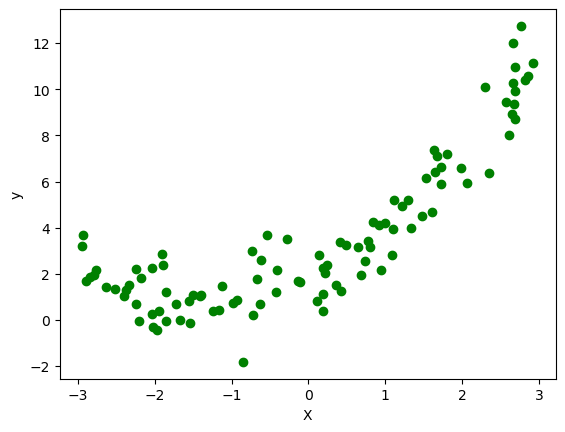

In [49]:
plt.scatter(X,y,color='g')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25 , random_state = 42)

#### Implementing Simple Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
regression_1 = LinearRegression()

In [53]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [54]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test,regression_1.predict(X_test))
score1

0.6455793325101526

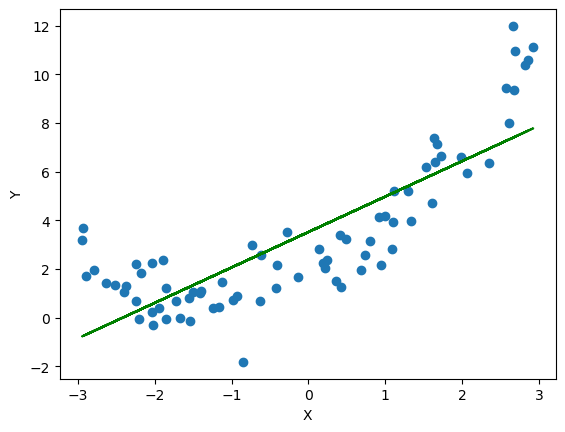

In [55]:
## Visualise
plt.plot(X_train,regression_1.predict(X_train),color='g') 
plt.scatter(X_train,y_train) 
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Implementing Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures


#### Generate polynomial and interaction features.

Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].

include_bias : bool, default=True
If True (default), then include a bias column, the feature in which all polynomial powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).

In [57]:
poly = PolynomialFeatures(degree = 2, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [58]:
X_train_poly

array([[ 1.        ,  0.24601137,  0.06052159],
       [ 1.        ,  0.2109243 ,  0.04448906],
       [ 1.        ,  1.11535274,  1.24401174],
       [ 1.        , -1.84942267,  3.4203642 ],
       [ 1.        , -1.89345273,  3.58516323],
       [ 1.        ,  1.64904051,  2.7193346 ],
       [ 1.        ,  1.53298519,  2.3500436 ],
       [ 1.        , -0.84724412,  0.71782259],
       [ 1.        ,  2.56381402,  6.57314234],
       [ 1.        ,  1.72756324,  2.98447475],
       [ 1.        , -2.94023136,  8.64496043],
       [ 1.        ,  2.8610749 ,  8.1857496 ],
       [ 1.        ,  1.30196262,  1.69510666],
       [ 1.        , -2.88728028,  8.33638742],
       [ 1.        , -0.41085292,  0.16880012],
       [ 1.        ,  1.08845266,  1.18472919],
       [ 1.        ,  2.34833518,  5.51467813],
       [ 1.        , -2.92660167,  8.56499735],
       [ 1.        , -2.3990634 ,  5.75550522],
       [ 1.        , -2.24354692,  5.03350279],
       [ 1.        , -1.16058678,  1.346

In [59]:
X_test_poly

array([[ 1.        , -2.33720209,  5.46251363],
       [ 1.        , -0.10377364,  0.01076897],
       [ 1.        ,  1.21417566,  1.47422252],
       [ 1.        ,  2.30122757,  5.29564834],
       [ 1.        ,  0.77869359,  0.60636371],
       [ 1.        , -1.90827046,  3.64149613],
       [ 1.        ,  2.66667019,  7.1111299 ],
       [ 1.        ,  1.47852794,  2.18604486],
       [ 1.        , -2.84202104,  8.0770836 ],
       [ 1.        , -2.76600849,  7.65080296],
       [ 1.        , -1.9742124 ,  3.8975146 ],
       [ 1.        ,  2.6834303 ,  7.20079816],
       [ 1.        ,  2.69217575,  7.24781029],
       [ 1.        , -0.67332138,  0.45336168],
       [ 1.        ,  1.73109075,  2.99667519],
       [ 1.        ,  1.80879815,  3.27175074],
       [ 1.        ,  0.10663505,  0.01137103],
       [ 1.        ,  2.76009759,  7.61813871],
       [ 1.        ,  2.6424871 ,  6.98273806],
       [ 1.        , -0.72405333,  0.52425323],
       [ 1.        ,  0.83771801,  0.701

In [60]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9032865576896196


In [61]:
print(regression.coef_)

[[0.         1.49853374 0.56277635]]


In [62]:
print(regression.intercept_)

[1.78912964]


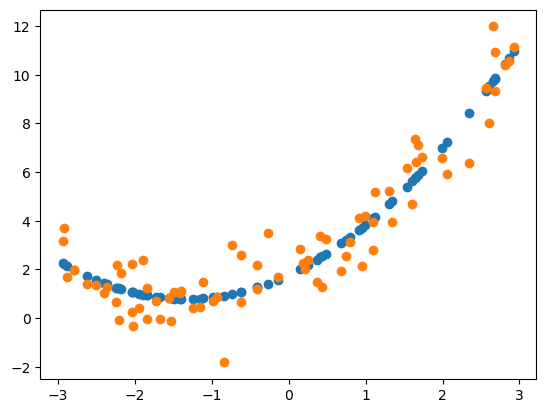

In [66]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)
plt.show()

#### Prediction of new data

In [69]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

In [70]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

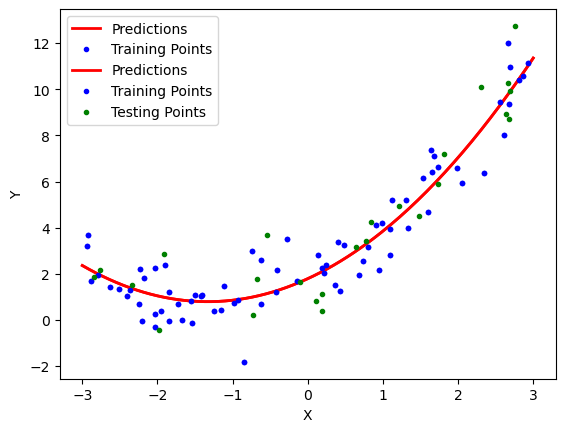

In [78]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new,y_new,"r-",linewidth=2,label = "Predictions")
plt.plot(X_train,y_train,"b.",label="Training Points")
plt.plot(X_test,y_test,"g.",label="Testing Points")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()


## Pipeline Concepts
A sequence of data transformers with an optional final predictor.

Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
def poly_regression(degree):
    X_new_poly = np.linspace(-3,3,200).reshape(200,1)

    poly_features = PolynomialFeatures(degree = degree,include_bias=True)
    lin_reg = LinearRegression()

    poly_regression = Pipeline([
        ("poly_features",poly_features),
        ('lin_reg',lin_reg)
    ])

    poly_regression.fit(X_train,y_train)
    y_pred_new = poly_regression.predict(X_new)

    # Plotting prediction line

    plt.plot(X_new,y_pred_new,'r',label = "Degree "+str(degree),linewidth = 3)
    plt.plot(X_train,y_train,"b.",linewidth = 3)
    plt.plot(X_test,y_test,"g.",linewidth = 3)

    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4,4,0,10])
    plt.show()

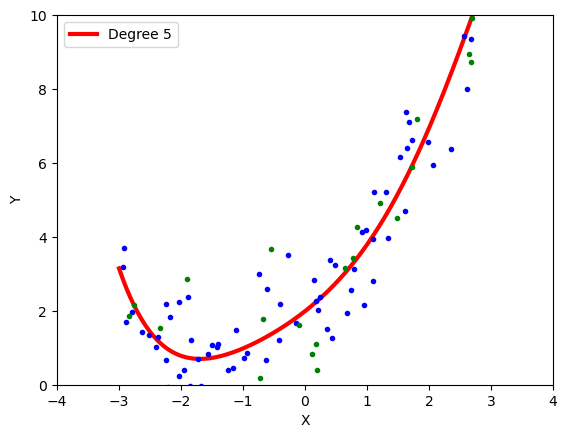

In [82]:
poly_regression(5)

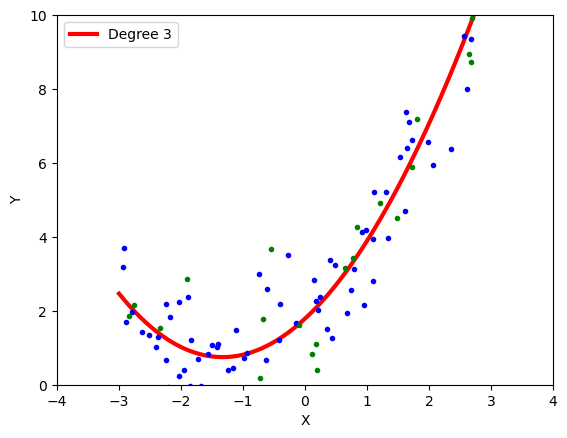

In [83]:
poly_regression(3)

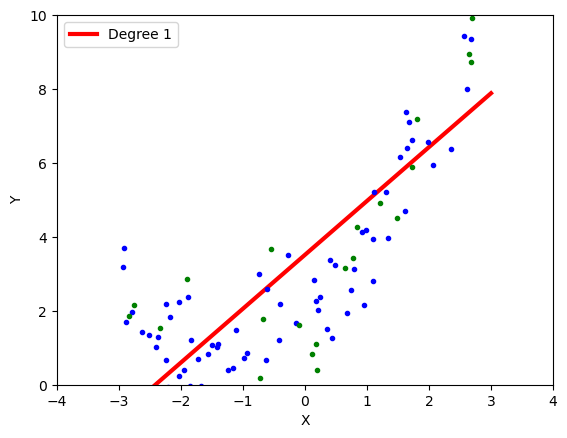

In [84]:
poly_regression(1)

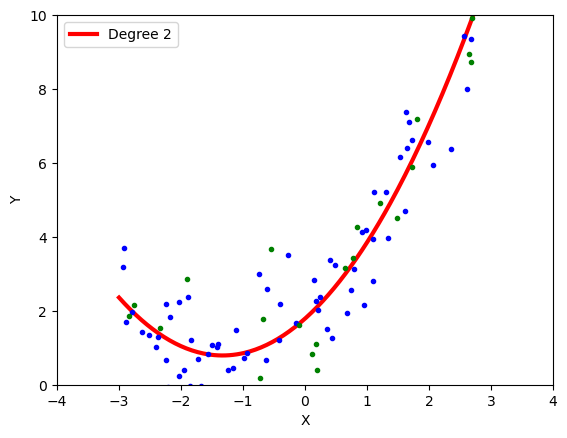

In [85]:
poly_regression(2)

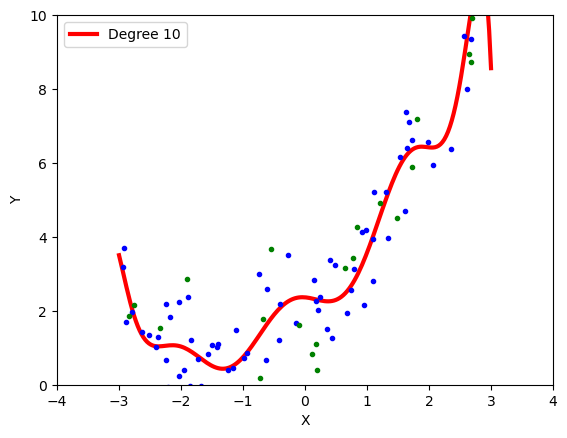

In [ ]:
# starts overfitting
poly_regression(10)